In [2]:
import matplotlib.cm as cmx
from mpl_toolkits.mplot3d import Axes3D
def scatter3d(x,y,z, cs, colorsMap='jet'):
    cm = plt.get_cmap(colorsMap)
    cNorm = matplotlib.colors.Normalize(vmin=min(cs), vmax=max(cs))
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(x, y, z, c=scalarMap.to_rgba(cs))
    scalarMap.set_array(cs)
    fig.colorbar(scalarMap)
    plt.show()


In [3]:

import numpy as np
import pandas as pd
import matplotlib as mpl

import matplotlib.pyplot as plt


from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LinearSegmentedColormap


In [13]:
from mayavi import mlab
import mayavi as may

In [5]:
datos = pd.read_csv("eval_petro(pasado).csv")
datos['DT'] = 189 - (datos['RHOB'] -1)*datos['M']/0.01
datos['N'] = (1 - datos['NPHI'])/(datos['RHOB'] - 1)
datos['L'] = 0.01 * (189 - datos['DT'])/(1-datos['NPHI'])

In [6]:

phi_primaria1 = [0.5241,0.5848,0.6273,0.5241]
phi_primaria2 = [0.7781,0.8269,0.8091,0.7781]
P_inicial=[0.5051,0.5241,0.5848,0.6273,0.6273,0.5051]
P_final  =[0.7020,0.7781,0.8269,0.8091,0.8091,0.7020]
P_M1=[0.5241,0.6273]
P_M2=[0.7781,0.8091]
v_x1=[0.5241,0.5241]
v_y1=[0.7781,0.95]
v_x2=[0.5848,0.5848]
v_y2=[0.8269,0.95]
v_x3=[0.6273,0.6273]
v_y3=[0.8091,0.95]


In [7]:
N = np.array(datos['N'])
M = np.array(datos['M'])
L = np.array(datos['L'])
PROF = np.array(datos['PROF'])

In [8]:
PROF[399]

3956.304

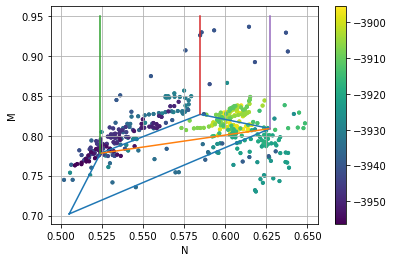

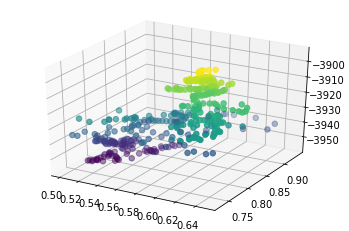

In [9]:
#cm = plt.get_cmap("RdYlGn")

x = np.random.rand(30)
y = np.random.rand(30)
z = np.random.rand(30)
#col = np.arange(400)
col= np.linspace(-1*PROF[0],-1*PROF[-1],400)

# 2D Plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(P_inicial,P_final,P_M1,P_M2,v_x1,v_y1,v_x2,v_y2,v_x3,v_y3)
ax.grid()
ax.set_xlabel('N')
ax.set_ylabel('M')
ax.scatter(N, M, s=8, c=col, marker='o') 
p2d = ax.scatter(N, M, s=10, c = col, marker='o')
plt.colorbar(p2d)

# 3D Plot
fig = plt.figure()
ax3D = fig.add_subplot(111, projection='3d')
p3d = ax3D.scatter(N, M, -1*PROF, s=30, c=col, marker='o')   
#ax3D.invert_zaxis()
#plt.colorbar(p3d)
plt.show()

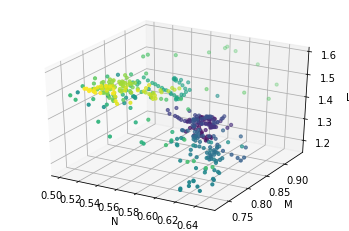

In [10]:
fig = plt.figure()
az = fig.add_subplot(111, projection='3d')
col = np.linspace(L[0],L[-1],400)
p3d = az.scatter(N, M, L, s=40, c=col, marker='.')
#ay.invert_zaxis()
az.set_xlabel('N')
az.set_ylabel('M')
az.set_zlabel('L')
#plt.colorbar(p3d)
plt.show()


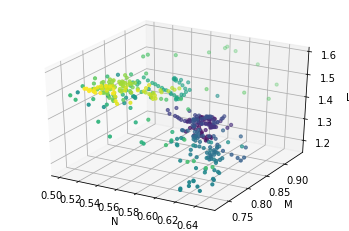

In [11]:
#ahora la figura 3D del M, N, & L
fig = plt.figure()
az = fig.add_subplot(111, projection='3d')
colL = np.linspace(L[0],L[-1],400)
p3d = az.scatter(N, M, L, s=40, c=colL, marker='.')
#ay.invert_zaxis()
az.set_xlabel('N')
az.set_ylabel('M')
az.set_zlabel('L')
#plt.colorbar(p3d)
plt.show()


In [19]:
from mayavi import mlab
mlab.points3d(N, M, L, PROF)

#may.points3d(N, M, L, PROF)

In [1]:
import numpy
from mayavi.mlab import *

def test_contour3d():
    x, y, z = np.ogrid[-5:5:64j, -5:5:64j, -5:5:64j]

    scalars = x * x * 0.5 + y * y + z * z * 2.0

    obj = contour3d(scalars, contours=4, transparent=True)
    return obj